# The Spark Foundation - GRIP July 2021

# Data Science and Business Analytics

# TASK 6  Prediction Using Decision Tree Algorithm

                                                                          -Kanjula Harshith Reddy

In [1]:
# importing libraries to read, analyse and visualize the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the file

data = pd.read_csv("Iris.csv")
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [3]:
# info of file

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# describe function gives the basic numerical info about the data for each numeric feature

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


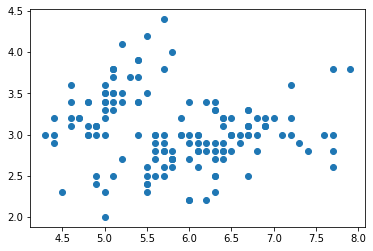

<function matplotlib.pyplot.show(close=None, block=None)>

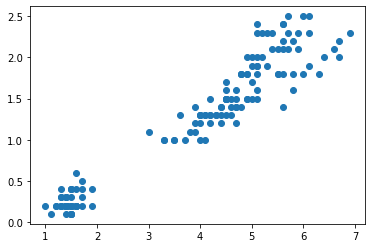

In [5]:
# Visualizing the dataset features to find pattern to solve the task

plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.show()
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
plt.show

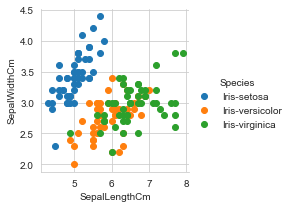

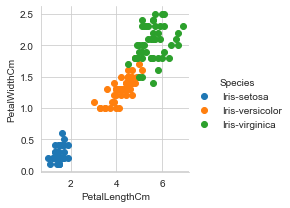

In [6]:
# using seaborn lib to visualize 2 features based on target variable

sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Species') \
   .map(plt.scatter, 'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

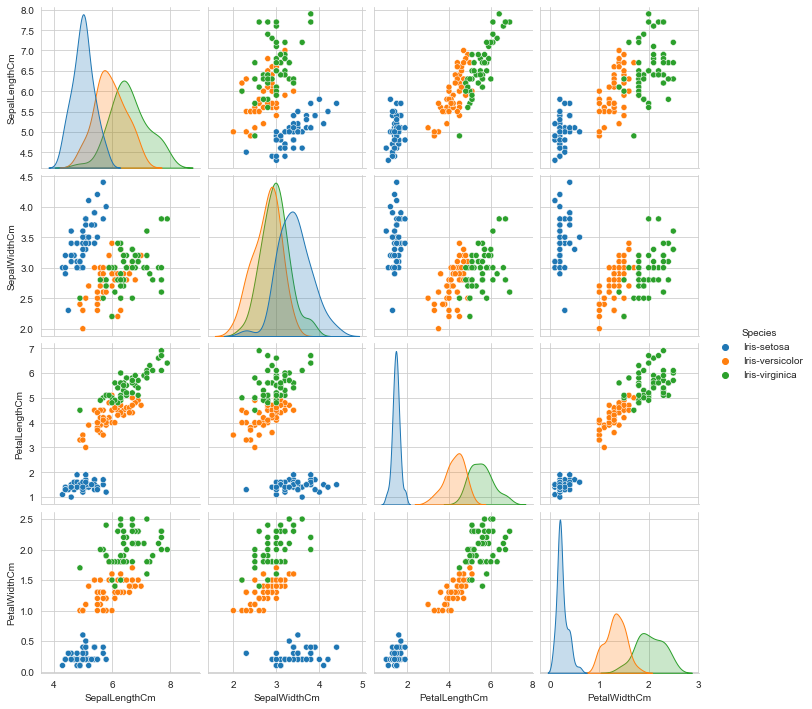

In [7]:
#Pair plot gives the relationship between all features with each other

sns.pairplot(data.drop(['Id'],axis = 1), hue = 'Species')
plt.show()

In [8]:
# Calculating new feature using data

data['Sepal_diff'] = data['SepalLengthCm']-data['SepalWidthCm']
data['Petal_diff'] = data['PetalLengthCm']-data['PetalWidthCm']

data['Sepal_Petal_len_diff'] = data['SepalLengthCm']-data['PetalLengthCm']
data['Sepal_Petal_wid_diff'] = data['SepalWidthCm']-data['PetalWidthCm']

data['Sepal_Petal_len_wid_diff'] = data['SepalLengthCm']-data['PetalWidthCm']
data['Sepal_Petal_wid_len_diff'] = data['SepalWidthCm']-data['PetalLengthCm']


In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_wid_diff,Sepal_Petal_len_wid_diff,Sepal_Petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2


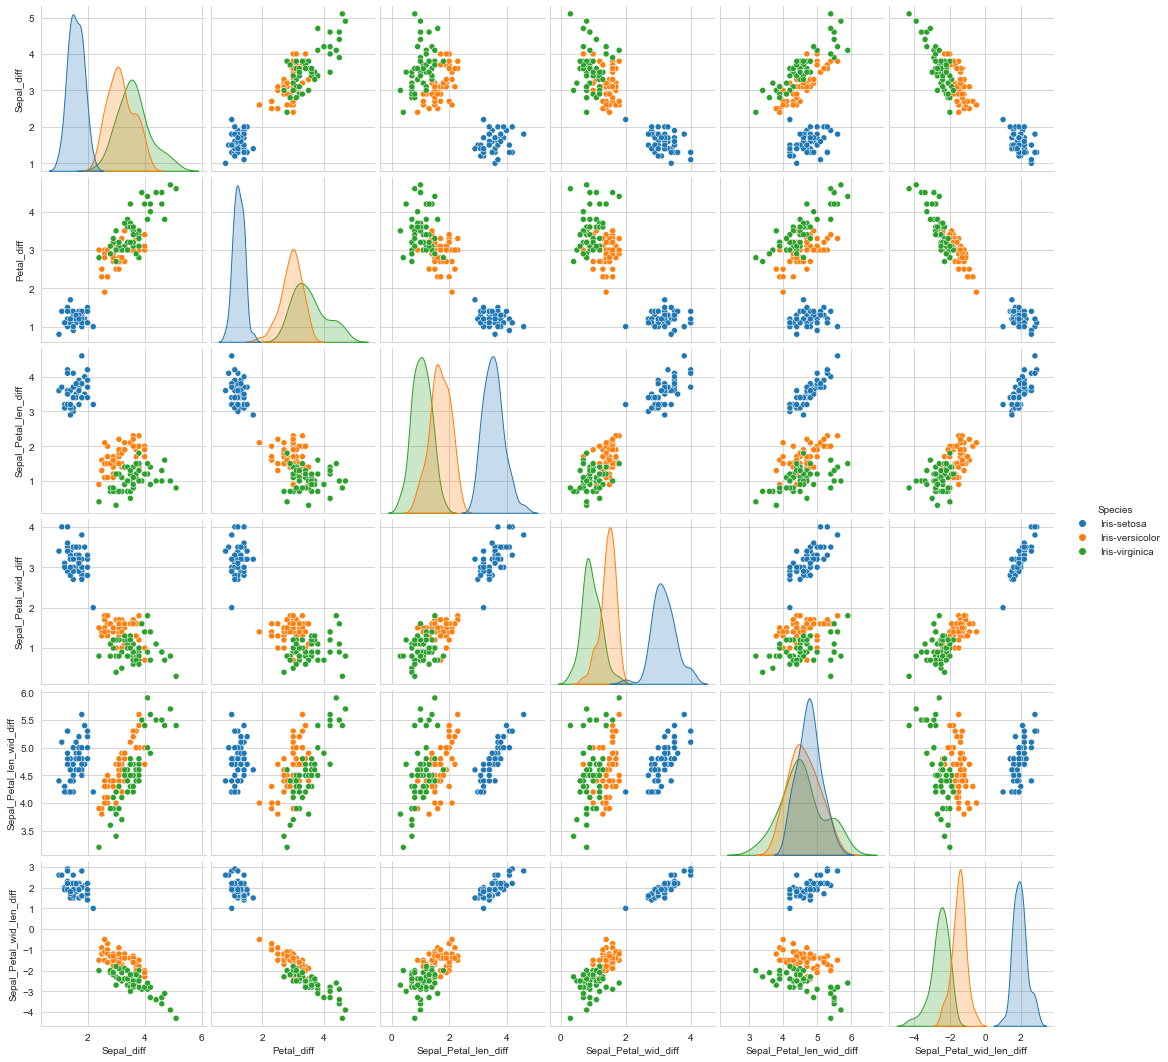

In [10]:
#Finding new relation between new features 

sns.pairplot(data[['Species','Sepal_diff','Petal_diff','Sepal_Petal_len_diff','Sepal_Petal_wid_diff','Sepal_Petal_len_wid_diff','Sepal_Petal_wid_len_diff']], hue = 'Species')
plt.show()

# Building Model

In [11]:
# importing libraries to create Decision Tree Classifier and to visualize it

from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


In [12]:
#Droping Id column

data.drop(['Id'],axis=1,inplace=True)

In [13]:
#Dividing the dataset into Independent variable and target variable

x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Sepal_Petal_wid_len_diff','Sepal_Petal_wid_diff']]
y = data['Species']

In [14]:
#spliting data into actual train and actual test dataset for training, validation

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test

xt,xcv,yt,ycv = train_test_split(x_train,y_train, test_size=0.10, random_state=42)


[Text(152.1818181818182, 199.32, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(121.74545454545455, 163.07999999999998, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(182.61818181818182, 163.07999999999998, 'X[4] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(121.74545454545455, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(91.30909090909091, 90.6, 'X[2] <= 5.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(60.872727272727275, 54.359999999999985, 'X[0] <= 5.6\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(30.436363636363637, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(91.30909090909091, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(121.74545454545455, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(152.1818181818182, 90.6, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(243.4909090909091,

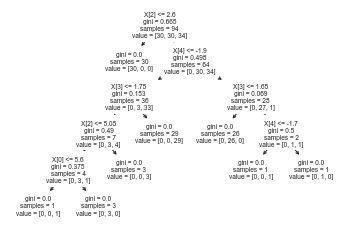

In [15]:
#Creating decision tree classifier and training it

clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
clf.fit(xt,yt)

#visualizing the tree 
tree.plot_tree(clf)

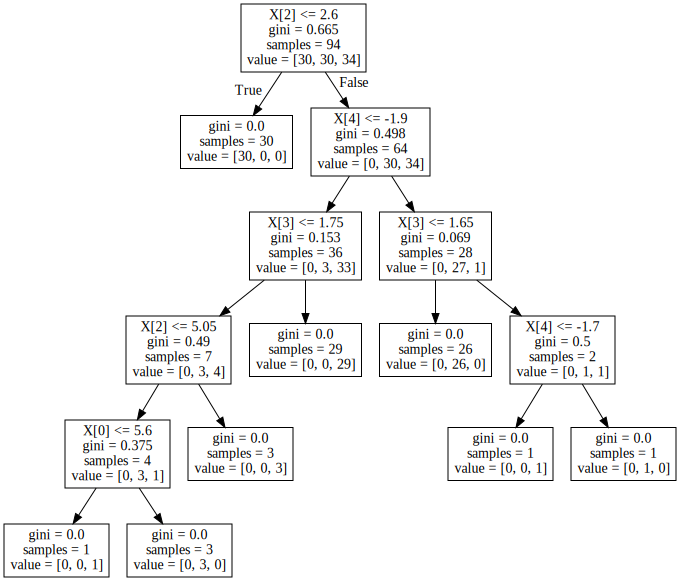

In [16]:
#Visualizing decision tree using graphviz library

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [17]:
#accuracy of the model using cross validation method

print('Accuracy score is:',cross_val_score(clf, xt, yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9254032258064516


In [18]:
#checking validation test data on trained model

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = clf.predict(xcv)

print('Accuracy score for validation test data is:', accuracy_score(ycv,yhat))
multilabel_confusion_matrix(ycv,yhat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [19]:
#checking the model on actual unseen data

yt_hat = clf.predict(x_test)

print('Model accuracy score on unseen data is:', accuracy_score(y_test,yt_hat)*100,'%')
multilabel_confusion_matrix(y_test,yt_hat)

Model accuracy score on unseen data is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

# Training model on actual train data

[Text(200.88000000000002, 203.85, 'X[4] <= 0.25\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(167.40000000000003, 176.67000000000002, 'X[4] <= -1.9\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(100.44000000000001, 149.49, 'X[3] <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(66.96000000000001, 122.31, 'X[4] <= -2.6\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(33.480000000000004, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(100.44000000000001, 95.13, 'X[5] <= 0.9\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(66.96000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 67.94999999999999, 'X[2] <= 5.05\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(100.44000000000001, 40.77000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(167.40000000000003, 40.77000000000001, 'X[1] <= 2.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(133.9200000000000

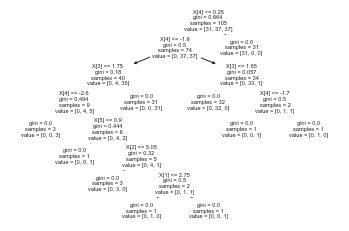

In [20]:
fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
fclf.fit(x_train,y_train)

tree.plot_tree(fclf)

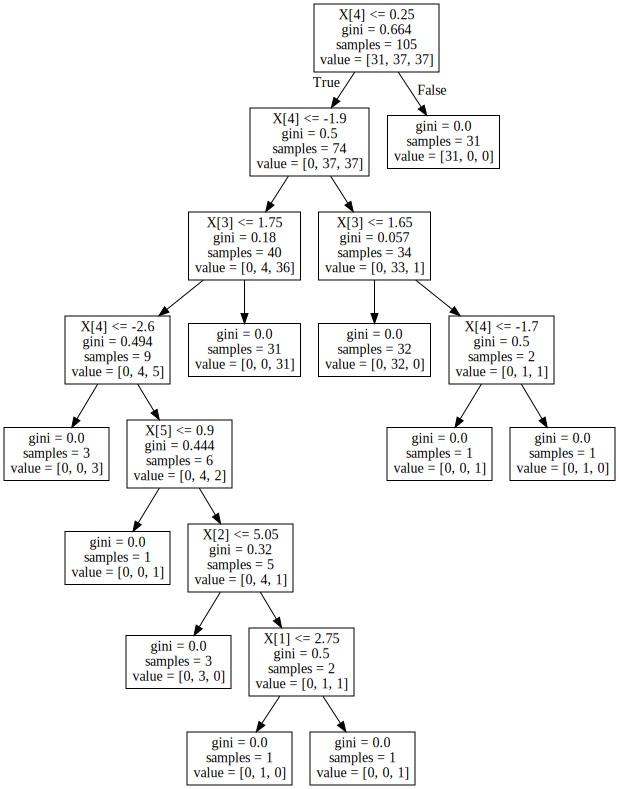

In [21]:
#Final decision tree 

dot_data=tree.export_graphviz(fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [22]:
#checking performance of model on actual test data

yt_fhat = fclf.predict(x_test)

print('Model Accuracy Score on unseen data is :', accuracy_score(y_test,yt_fhat)*100,'%')
multilabel_confusion_matrix(y_test,yt_fhat)

Model Accuracy Score on unseen data is : 97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 1, 12]],

       [[31,  1],
        [ 0, 13]]], dtype=int64)

In [23]:
# Testing with New points not in the dataset

test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]
print(fclf.predict(test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica']
